# Assignment 4 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr, spearmanr, ttest_ind

<b> Opening csv file and changing column headers</b>

In [2]:
df = pd.read_csv('movies.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,title,us_gross,worldwide_gross,us_dvd_sales,production_budget,release_date,mpaa_rating,running_time_(min),distributor,source,major_genre,creative_type,director,rotten_tomatoes_rating,imdb_rating,imdb_votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [3]:
df.worldwide_gross.max()

'Unknown'

## Histogram for WW GROSS (Right Skewed Distribution)

<ul>
    <li>Βρέθηκαν 7 ταινίες με τιμή 'Unknown' για το for worldwide_gross</li>
    <li>Drop των 7 ταινιών επειδη δεν ειναι πολλά και δεν θα επηρεάσουν τα δεδομένα (3194 ταινίες)</li>
    <li>Μετατροπή της στήλης worldwide_gross απο Object(str) σε int (int64 για αποφυγή υπερχείλισης)</li>
</ul>

<b>Τα περισσότερα έσοδα ειναι χαμηλά</b>

Text(0, 0.5, 'Amount')

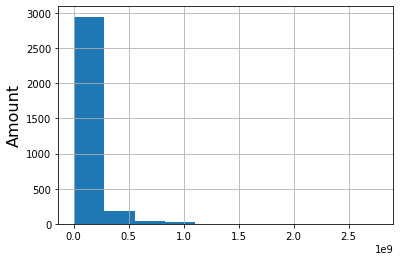

In [4]:
L = [i for i,r in df.iterrows() if r.worldwide_gross == 'Unknown']

df.drop(L, inplace=True)

df.worldwide_gross = df.worldwide_gross.astype('int64')

wwh = df.worldwide_gross.hist()

plt.ylabel('Amount', fontsize=16)

<b>Με χρήση loglog βλέπουμε καλύτερα τη διανομή. Περισσότερα έσοδα μεταξύ:</b> $$10^0 - 10^9$$

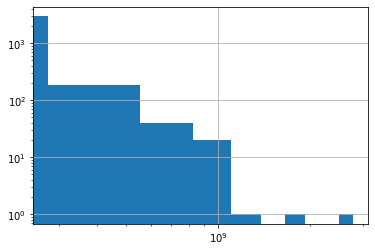

In [5]:
df.worldwide_gross.hist()
plt.loglog()
plt.show()

## Histogram for Rotten Tomatoes Rating (~Uniform Distribution)

<ul>
    <li>Βλέποντας τον αρχικό .info παρατηρούμε οτι υπάρχουν αρκετες NaN τιμές (~28%)</li>
    <li>Χρησιμοποιώντας ενα boxplot βλέπουμε οτι δεν υπάρχουν ακραίες τιμές (outliers) και άρα μπορούμε 
    να χρησμοποιήσουμε τον μέσο ορο (mean) για να γεμίσουμε τα κενά</li>
    <li>Πάνω σε αυτό προκύπτει και το ιστόγραμμα (55-60 / 100 most rates)</li>
</ul>

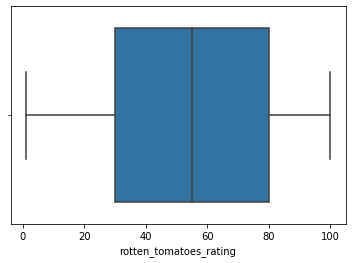

In [6]:
sns.boxplot(x=df.rotten_tomatoes_rating)


In [7]:
percent_missing = df.rotten_tomatoes_rating.isnull().sum() * 100 / len(df.rotten_tomatoes_rating)
percent_missing

27.48904195366312

<b>Περισσότερες βαθμολογίες μεταξύ 50-60</b>

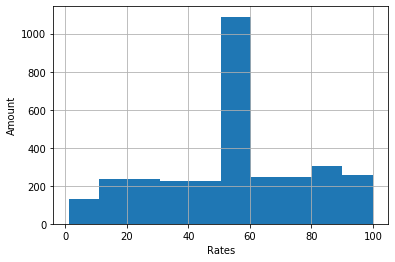

In [8]:
df.rotten_tomatoes_rating.fillna(value=df.rotten_tomatoes_rating.mean(), inplace=True)
# sns.distplot(df.rotten_tomatoes_rating, kde=False)
df.rotten_tomatoes_rating.hist()
plt.xlabel('Rates')
plt.ylabel('Amount')
plt.show()

## Histogram for IMDB RATING (Normal Distribution)

<ul>
    <li>Βλέποντας τον αρχικό .info παρατηρούμε οτι και εδώ υπάρχουν κάποιες NaN τιμες (~7%)</li>
    <li>Η διαφορά με το προηγούμενο ειναι οτι εδώ υπάρχουν ακραιες τιμές (outliers) και επομένως θα 
    χρησιμοποιήσουμε ενα median για να γεμήσουμε αυτα τα κενά</li>
    <li>Πάνω σε αυτό προκύπτει και το ιστόγραμμα (6-7 / 10 most rates)</li>
</ul>

Percent missing:6.606136505948654


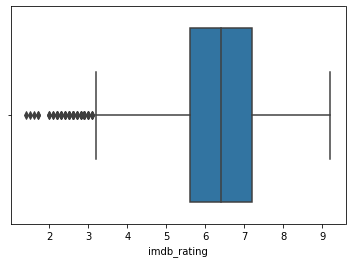

In [9]:
percent_missing = df.imdb_rating.isnull().sum() * 100 / len(df.imdb_rating)
print("Percent missing:" + str(percent_missing))

sns.boxplot(x=df.imdb_rating)


<b>Περισσότερες βαθμολογίες μεταξύ 6-7</b>

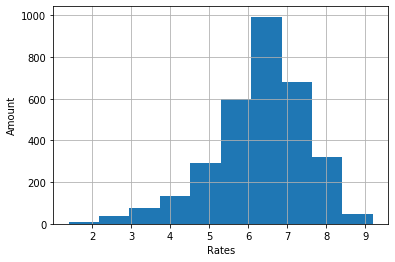

In [10]:
df.imdb_rating.fillna(value=df.imdb_rating.median(), inplace=True)
# sns.distplot(df.imdb_rating, kde=False)
df.imdb_rating.hist()
plt.xlabel('Rates')
plt.ylabel('Amount')
plt.show()

## Histogram IMDB VOTES (Right Skewed Distribution)

<ul>
    <li>Με τη χρηση <b>df.dropna(subset=['imdb_votes', 'imdb_rating'])</b> παρατηρούμε ότι οι nan τιμές 
    του imdb_votes, imdb_rating συσχετίζονται (ίδια γραμμή)</li>
    <li>Επομένως και εδώ χρήση του median για τις κενές τιμές</li>
</ul>

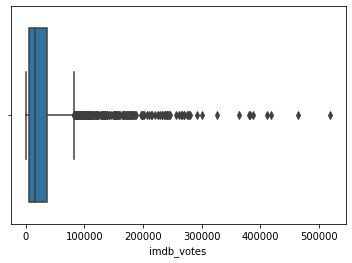

In [11]:
sns.boxplot(df.imdb_votes)


<b>Τα περισσότερα #votes ειναι μεταξύ 0-50000</b>

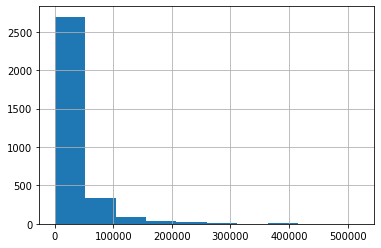

In [12]:
df.imdb_votes.fillna(value=df.imdb_votes.median(), inplace=True)

df.imdb_votes.hist()

## Barplot MAJOR GENRE  

<ul>
    <li>Παρατηρώντας τις κατηγορίες βλέπουμε οτι υπάρχουν "υποκατηγορίες" Κωμωδίας(Black Comedy, Romantic Comedy)
        οι οποίες μαζί κανουν την πιο δημοφιλή κατηγορία,<b> αλλιώς η πιό δημοφιλή ειναι η Drama</b>. (Δεν εγινε ένωση τον   υποκατηγοριών επειδή θεωρώ οτι αν σε κάποιον αρέσει η κατηγορία Black Comedy δεν σημαίνει οτι θα του αρέσει αναγκαστηκά
        και η κατηγορία Comedy, άρα δεν θα είναι και η πιο δημοφιλή)</li>
    <li>Οι κατηγορίες Thriller/Suspense και Concert/Performance δεν διασπάστηκαν επειδή δεν βρήκα ταινίες που ειχαν μονο Thriller κτλ. στο frame</li>
</ul>

In [13]:
df.major_genre.value_counts()

Drama                  789
Comedy                 674
Action                 420
Adventure              274
Thriller/Suspense      239
Horror                 219
Romantic Comedy        137
Musical                 53
Documentary             43
Black Comedy            36
Western                 36
Concert/Performance      5
Name: major_genre, dtype: int64

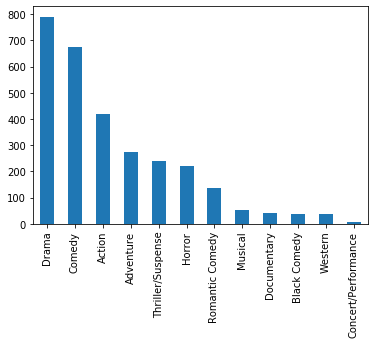

In [14]:
df.major_genre.fillna(value=df.major_genre.mode()).value_counts().plot.bar()

<b>Με χρήση του seaborn's countplot (no .value_counts() needed)</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

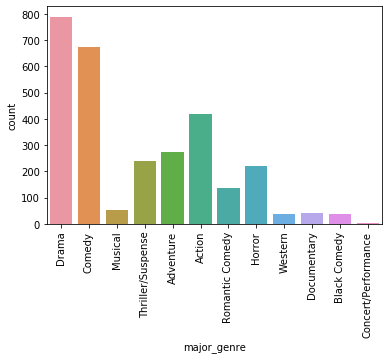

In [15]:
sns.countplot(x='major_genre', data=df)
plt.xticks(rotation=90)

<b>ScatterPlot (IMDB VOTES,WORLWIDE GROSS) with symmetrical log scale</b>  
Βλέπουμε ότι οσο αυξάνονται τα έσοδα τοσο θα αυξάνονται και τα imdb votes αντίστοιχα (γραμμική κατανομή)

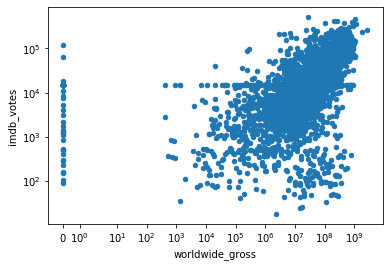

In [16]:
df.plot(kind='scatter', x='worldwide_gross', y='imdb_votes', loglog = 'sym')

## PairPlot “Worldwide Gross”, “RottenTomatoes Rating”, “IMDB Rating”, “IMDB votes”


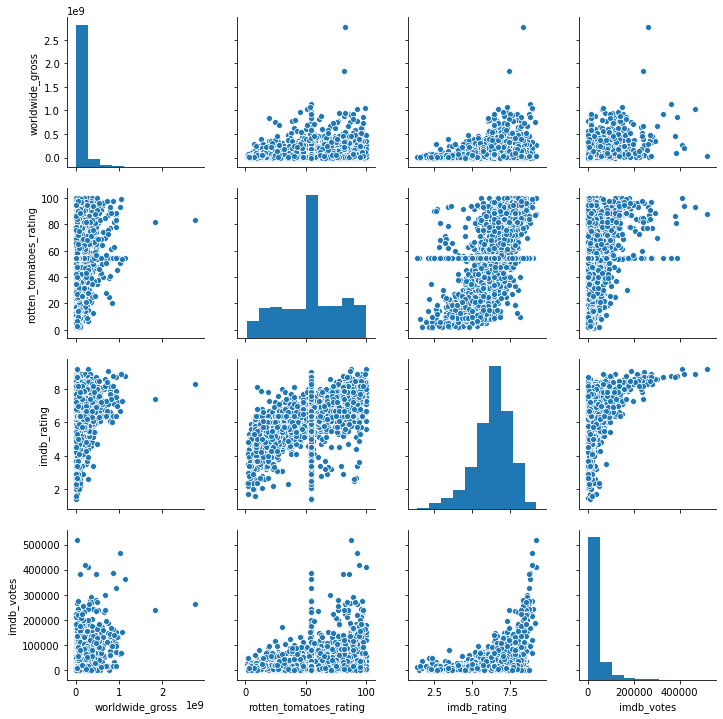

In [17]:
x = df[['worldwide_gross', 'rotten_tomatoes_rating', 'imdb_rating', 'imdb_votes']]
sns.pairplot(x)


## Spearman correlation coefficients
Υπάρχει μια γραμμική συσχετιση μεταξύ:  
    - imdb_rating, rotten_tomatoes_rating (0.624346) 
    (- worldwide_gross, imdb_votes (0.531263) )

In [18]:
corr = x.corr()
corr

,worldwide_gross,rotten_tomatoes_rating,imdb_rating,imdb_votes
worldwide_gross,1.000000,0.140692,0.189682,0.531263
rotten_tomatoes_rating,0.140692,1.000000,0.624346,0.293309
imdb_rating,0.189682,0.624346,1.000000,0.464425
imdb_votes,0.531263,0.293309,0.464425,1.000000


<b>Με χρήση HeatMap βλέπουμε καλύτερα την συσχέτιση του IMDB Rating, Rotten Tomatoes Rating</b>

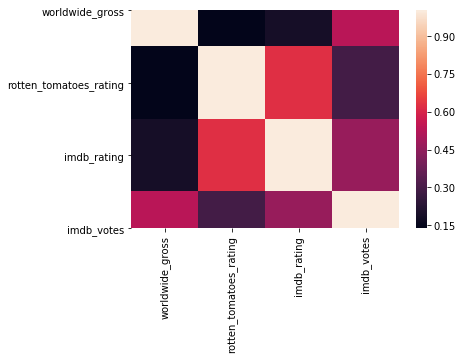

In [19]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## P-values (pearson)

Οι τιμές του p-values τείνουν στο 0, επομένως οι (αρχικοί) συσχετισμοί δεν ήταν τυχαίοι.  
Με άλλα λόγια η κρητικές στο imbd rating, και rotten tomatoes rating δεν είναι ανεξάρτητες μεταξύ τους  

In [20]:
x.corr(method=lambda a, y: pearsonr(a, y)[1]) - np.eye(len(x.columns)) 

,worldwide_gross,rotten_tomatoes_rating,imdb_rating,imdb_votes
worldwide_gross,0.000000e+00,1.372021e-15,2.952469e-27,3.683731e-232
rotten_tomatoes_rating,1.372021e-15,0.000000e+00,0.000000e+00,2.130225e-64
imdb_rating,2.952469e-27,0.000000e+00,0.000000e+00,1.214900e-170
imdb_votes,3.683731e-232,2.130225e-64,1.214900e-170,0.000000e+00


## Spearman rank correlation coefficient

Παρατηρούμε οτι και με βάση τον Spearman οι υψηλότερες συσχετίσεις ειναι και πάλι: 
- imdb_rating, rotten_tomatoes_rating (0.646664) 
- worldwide_gross, imdb_votes (0.630995) 

In [21]:
sp_corr = x.corr(method='spearman')
sp_corr

,worldwide_gross,rotten_tomatoes_rating,imdb_rating,imdb_votes
worldwide_gross,1.000000,0.079439,0.133102,0.630995
rotten_tomatoes_rating,0.079439,1.000000,0.646664,0.236522
imdb_rating,0.133102,0.646664,1.000000,0.457134
imdb_votes,0.630995,0.236522,0.457134,1.000000


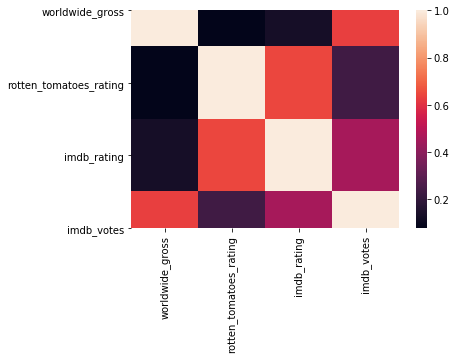

In [22]:
sns.heatmap(sp_corr, xticklabels=sp_corr.columns.values, yticklabels=sp_corr.columns.values)

## P-values (spearman)
p_values <0.5  
Από εδώ μπορούμε να συμπεράνουμε οτι υπάρχει ενα rank correlation μεταξύ gross και imdb_votes (in order placement)

In [23]:
sp_corr.corr(method=lambda a, y: spearmanr(a, y)[1]) - np.eye(len(x.columns)) 

,worldwide_gross,rotten_tomatoes_rating,imdb_rating,imdb_votes
worldwide_gross,0.0,0.0,0.2,0.2
rotten_tomatoes_rating,0.0,0.0,0.2,0.2
imdb_rating,0.2,0.2,0.0,0.4
imdb_votes,0.2,0.2,0.4,0.0


<b>Εδώ μπορούμε να δούμε καλύτερα την συσχέτιση μεταξύ worldwide_gross και imdb_votes.</b>

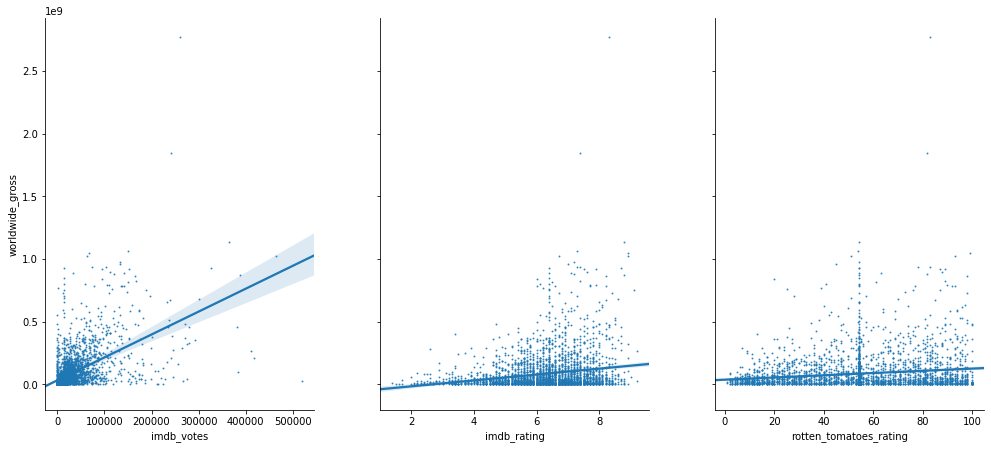

In [24]:
# plt.figure(figsize=(16,7))
g=sns.pairplot(data=df, y_vars=['worldwide_gross'],
             x_vars=['imdb_votes', 'imdb_rating', 'rotten_tomatoes_rating'], kind="reg", plot_kws=dict(scatter_kws=dict(s=0.9)))
g.fig.set_size_inches(15,8)


# Συσχέτιση μεταξύ του Genre και των εισόδων μιας ταινίας

Στο παρακάτω διάγραμμα βλέπουμε το μέσο worldwide gross για κάθε genre, καθώς και τα confidence intervals.  
Η κατηγορία Adventure εχει το υψηλότερο κερδος απο κάθε άλλη κατηγορία.  


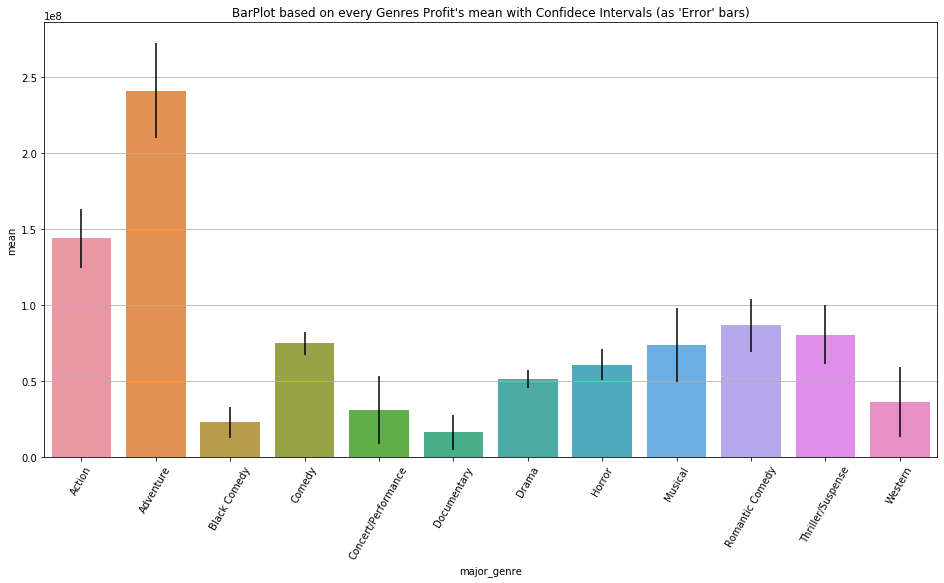

In [40]:
stats = df.groupby(['major_genre'])['worldwide_gross'].agg(['mean', 'count', 'std'])

# Confidence Intervals higher/lower band
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 0.96*s/math.sqrt(c))
    ci95_lo.append(m - 0.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

dg = pd.DataFrame(stats)
dg.reset_index(level=0, inplace=True)
plt.figure(figsize=(16,8))
plt.grid()
plt.title("BarPlot based on every Genres Profit's mean with Confidece Intervals (as 'Error' bars)")
sns.barplot(x='major_genre', y='mean', data=dg, yerr=(dg['ci95_hi']-dg['ci95_lo']))
plt.xticks(rotation=60)
plt.show()

<b>Seaborn boxplot</b>

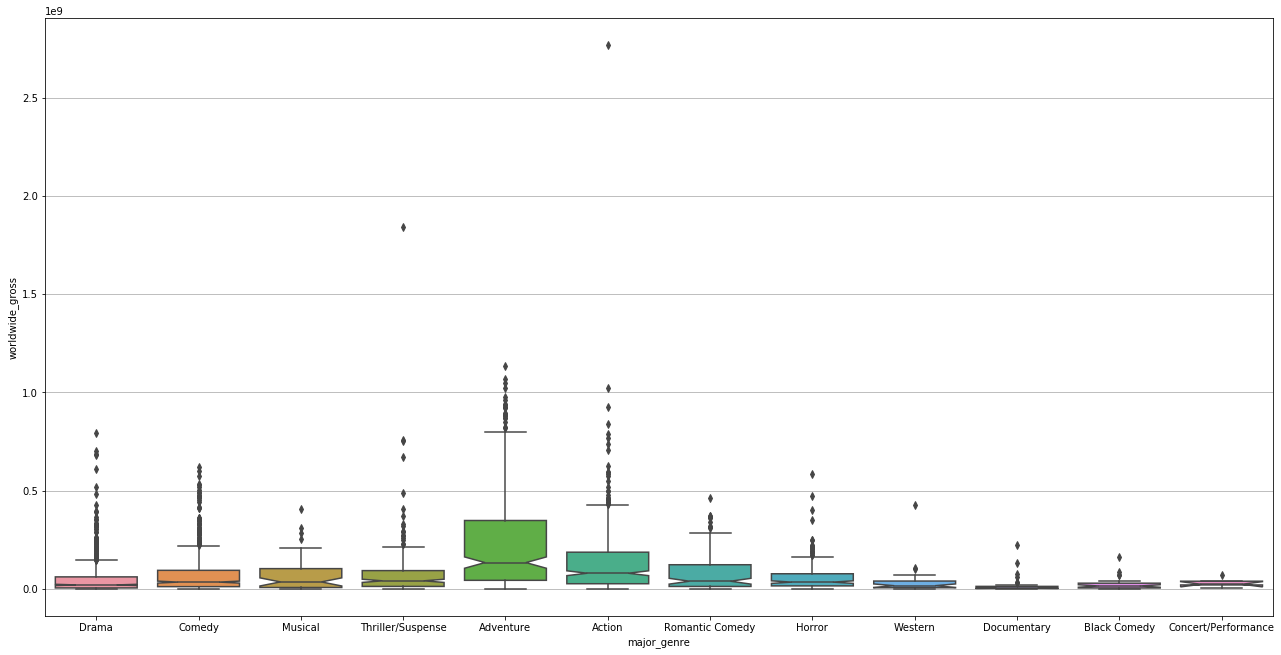

In [26]:
plt.figure(figsize=(22,11))
plt.grid()
sns.boxplot(df.major_genre, df.worldwide_gross, notch=True)


# 3. «Δεν κάνουν πια καλές ταινίες όπως παλιά»
<ul>
    <li>Η στήλη release_date αρχικα εχει πολλαπλές μορφές ημερομηνιών και ειναι σε dtype:Object.</li>
    <li>Οι μεταβλητές 'TBD' αντικαταστάθηκαν με τη χρήση ενός forward fill, και μετά απο μια μικρή αλλαγή της χρονιάς (95 -> 1994 κτλ.) έγινε μετατροπή της στήλης σε dtype:datetime64 (format:Y-M-D) για καλύτερη υλοποίηση του διαγράμματος </li>
    <li><b>Κοιτώντας το διάγραμμα παρακάτω παρατηρούμε οτι, υπάρχει μια υψηλότερη βαθμολόγηση μέχρι το ~1960 η οποία μετά πέφτει συνεχώς. Με βάση αυτά τα δεδομένα θα μπορούσε να πει κανείς πως όντως δεν κανουν πια καλές ταινιες (όπως παλιά).</b></li>
</ul>

In [27]:
# Object datatype
df.release_date.describe()

count          3194
unique         1598
top       11-Oct-02
freq              9
Name: release_date, dtype: object

In [28]:
df.release_date.replace(to_replace='TBD', value=np.NaN, inplace=True)
df.release_date.fillna(method='ffill' , inplace=True)

In [29]:
import re

for i,r in df.iterrows():
    d = re.split('-|, ',r.release_date)
    if int(d[-1]) > 11:
        if len(d[-1]) <=2:
            d[-1] = '19'+d[-1]
            date = '-'.join(d)
            df.loc[i, 'release_date'] = date
        elif int(d[-1])>=2000:
            df.loc[i, 'release_date'] = d[-1]
        
        else:
            date = '-'.join(d)
            df.loc[i, 'release_date'] = date

    else:
        d[-1] = '20'+d[-1]
        date = '-'.join(d)
        df.loc[i, 'release_date'] = date

In [30]:
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

In [31]:
df.imdb_rating.describe(), df.rotten_tomatoes_rating.describe()

(count    3194.000000
 mean        6.290451
 std         1.210480
 min         1.400000
 25%         5.600000
 50%         6.400000
 75%         7.100000
 max         9.200000
 Name: imdb_rating, dtype: float64, count    3194.000000
 mean       54.257772
 std        23.887755
 min         1.000000
 25%        40.000000
 50%        54.257772
 75%        71.000000
 max       100.000000
 Name: rotten_tomatoes_rating, dtype: float64)

Text(0.5, 0, 'Year')

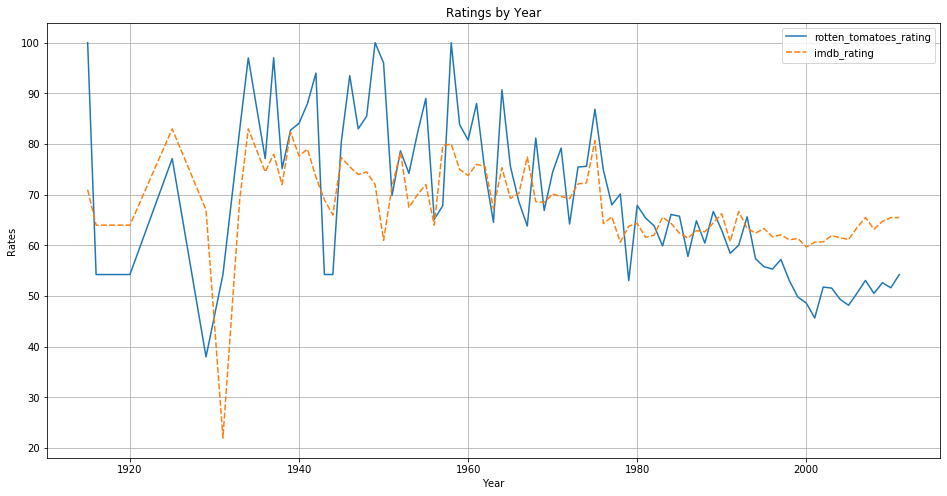

In [32]:
#Groupby Dateime Year and calc mean() 
a = df.groupby(df.release_date.dt.year)[['rotten_tomatoes_rating','imdb_rating']].mean()

a = pd.DataFrame(a)
a['imdb_rating'] = a['imdb_rating']*10

plt.figure(figsize=(16,8))
plt.grid()


sns.lineplot(data=a)
plt.title("Ratings by Year")
plt.ylabel('Rates')
plt.xlabel('Year')

<b>Επίσης στα δεδομένα μας οι περρισότερες ταινίες ειναι στη χρονία 2000, και γενικά δεν υπήρχαν πολλές παλιές ταινίες στο DataFrame (το οποίο ίσως να επηρεάζει λίγο το αποτέλεσμα) </b>

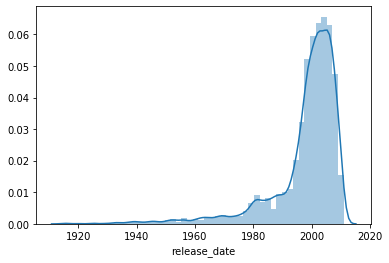

In [33]:
sns.distplot(df.release_date.dt.year)

# 4. Διατυπώστε ένα δικό σας ερώτημα και εξερευνήσετε το με τα δεδομένα

<b>- Έχει αυξηθεί o μέσος ορος παραγώγης(production budget) μιάς ταινίας με την πάροδο του χρόνου?</b>

Αντικατάσταση των κενών τιμών της στήλης production_budget με το median (λόγω outliers)

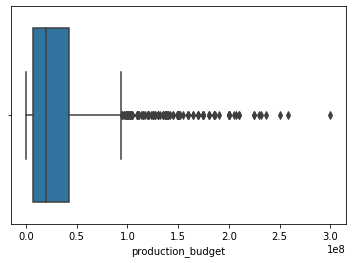

In [34]:
sns.boxplot(x=df.production_budget)

df.production_budget.fillna(value=df.production_budget.median(), inplace=True)

Οι περισσότερες ταινίες κοστίζουν μεταξύ: $$10-10^8$$

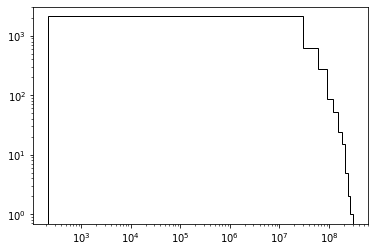

In [35]:

plt.hist(df['production_budget'], ec='black', histtype='step')
plt.loglog()
plt.show()

<b>Στο παρακάτω lineplot βλέπουμε οτι το κόστος παραγωγής μια ταινίας αυξάνεται ραγδαία με την πάροδο του χρόνου</b>  
<b>Μεγάλη αυξηση από το 1970 και μετά</b>

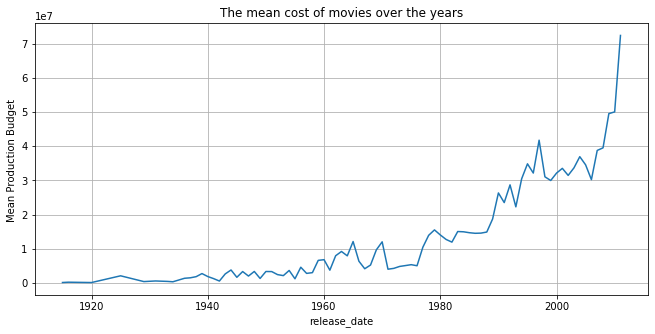

In [36]:
st = df.production_budget.groupby(df.release_date.dt.year).describe()


plt.figure(figsize=(11,5))
sns.lineplot(x=st.index,y=st['mean'])
plt.grid()
plt.title("The mean cost of movies over the years")
plt.ylabel("Mean Production Budget ")
plt.show()

<b>Κατηγορίες ταινιών ως προς το κόστος παραγωγής </b>

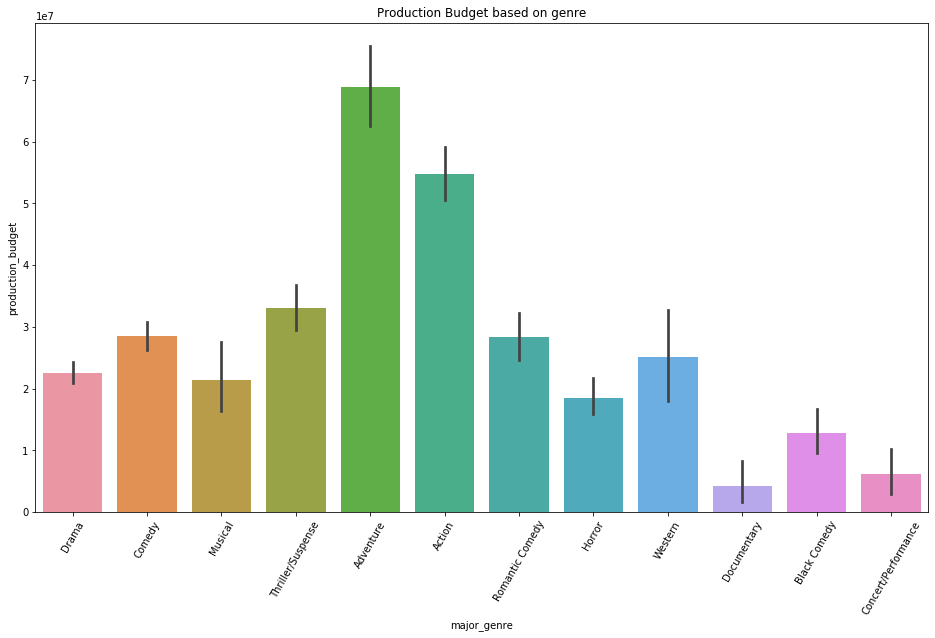

In [37]:
plt.figure(figsize=(16,9))
sns.barplot(df.major_genre, df.production_budget)
plt.title("Production Budget based on genre")
plt.xticks(rotation=60)
plt.show()

<b>Παρακάτω θα δείτε το κόστος παραγώγης μιας κατήγοριας πριν και μετά το 1970</b>

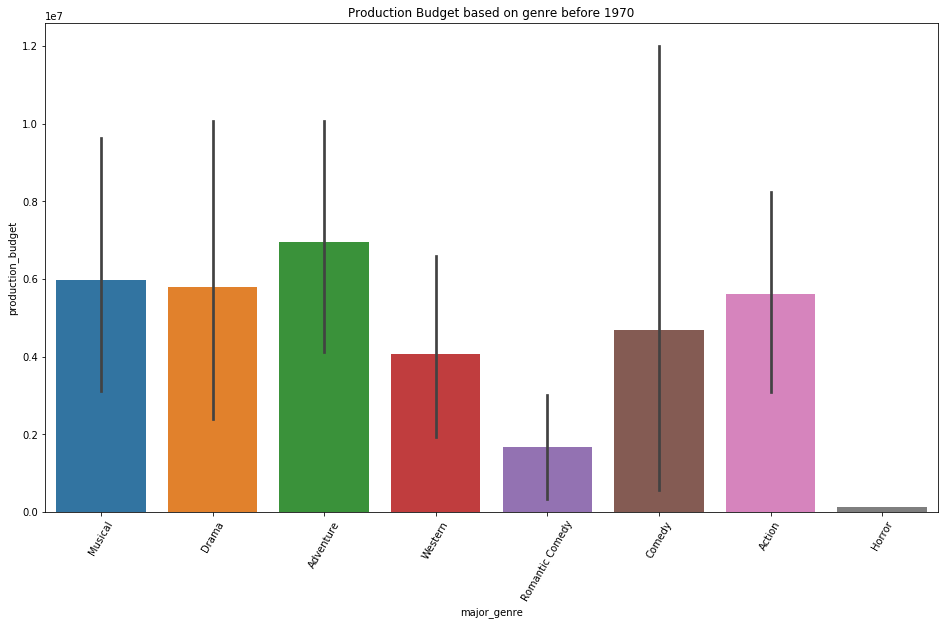

In [38]:
bf = df[df.release_date.dt.year < 1970]
plt.figure(figsize=(16,9))
sns.barplot(bf.major_genre, bf.production_budget)
plt.title("Production Budget based on genre before 1970")
plt.xticks(rotation=60)
plt.show()

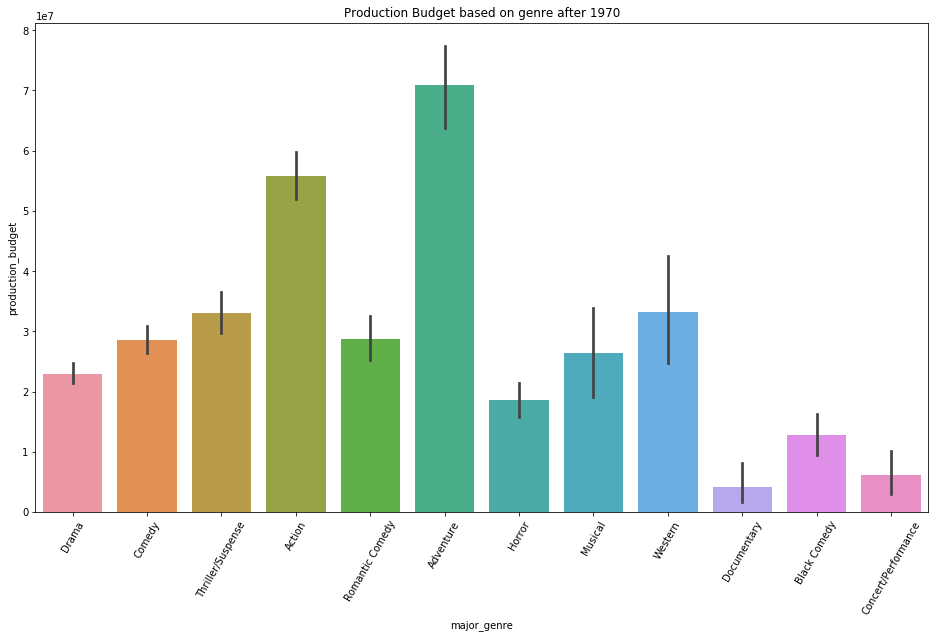

In [39]:
bf = df[df.release_date.dt.year > 1970]
plt.figure(figsize=(16,9))
sns.barplot(bf.major_genre, bf.production_budget)
plt.title("Production Budget based on genre after 1970")
plt.xticks(rotation=60)
plt.show()